# 1. Model Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LogisticRegression #machine learning

In [2]:
df = pd.read_csv("stroke.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   int64  
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   int64  
 5   work_type          1136 non-null   int64  
 6   Residence_type     1136 non-null   int64  
 7   avg_glucose_level  1136 non-null   float64
 8   bmi                1084 non-null   float64
 9   smoking_status     1136 non-null   int64  
 10  stroke             1136 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 97.8 KB


In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


In [5]:
# Get the number of unique values in each column
unique_counts = df.nunique()

print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    1068
bmi                   308
smoking_status          4
stroke                  2
dtype: int64


In [6]:
df.stroke.unique()

array([0, 1], dtype=int64)

### Data Cleaning

Option 1: Mean Imputation

In [7]:
# Replace the missing values with the mean value of the bmi column.
# df['bmi'].fillna(df['bmi'].mean(), inplace=True)

Option 2: Advanced Imputation

In [8]:
# Can also use advanced imputation techniques like k-Nearest Neighbors to predict the missing value based on its 'k' nearest neighbors.

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['bmi']] = imputer.fit_transform(df[['bmi']])

### Split the Data

In [9]:
X = df.drop(['stroke'], axis=1)
y = df.stroke.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fit and Eval the Model

In [10]:
accuracies = {}

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

acc = lr.score(X_test, y_test)*100
accuracies['Logistic Regression'] = acc

print("Test Accuracy {}".format(acc))

Test Accuracy 87.09677419354838


C:\Users\shamu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100

accuracies['Decision Tree Classifier'] = acc
print("Test Accuracy {}".format(acc))

Test Accuracy 81.23167155425219


In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

acc = rfc.score(X_test, y_test)*100
accuracies['Random Forest Classifier'] = acc

print("Test Accuracy {}".format(acc))

Test Accuracy 87.68328445747801


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

acc = knn.score(X_test, y_test)*100
accuracies['KNeighbors Classifier'] = acc

print("Test Accuracy {}".format(acc))

Test Accuracy 85.63049853372434


In [15]:
# Conclusion
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.2f}%") #f-string

Logistic Regression: 87.10%
Decision Tree Classifier: 81.23%
Random Forest Classifier: 87.68%
KNeighbors Classifier: 85.63%


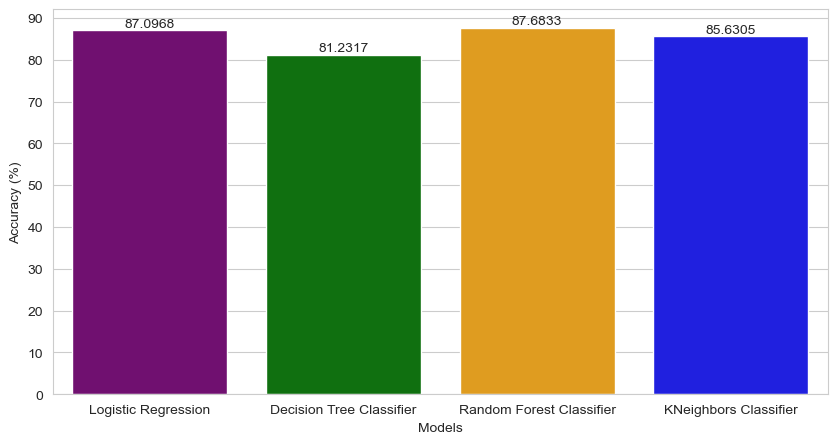

In [16]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")

ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

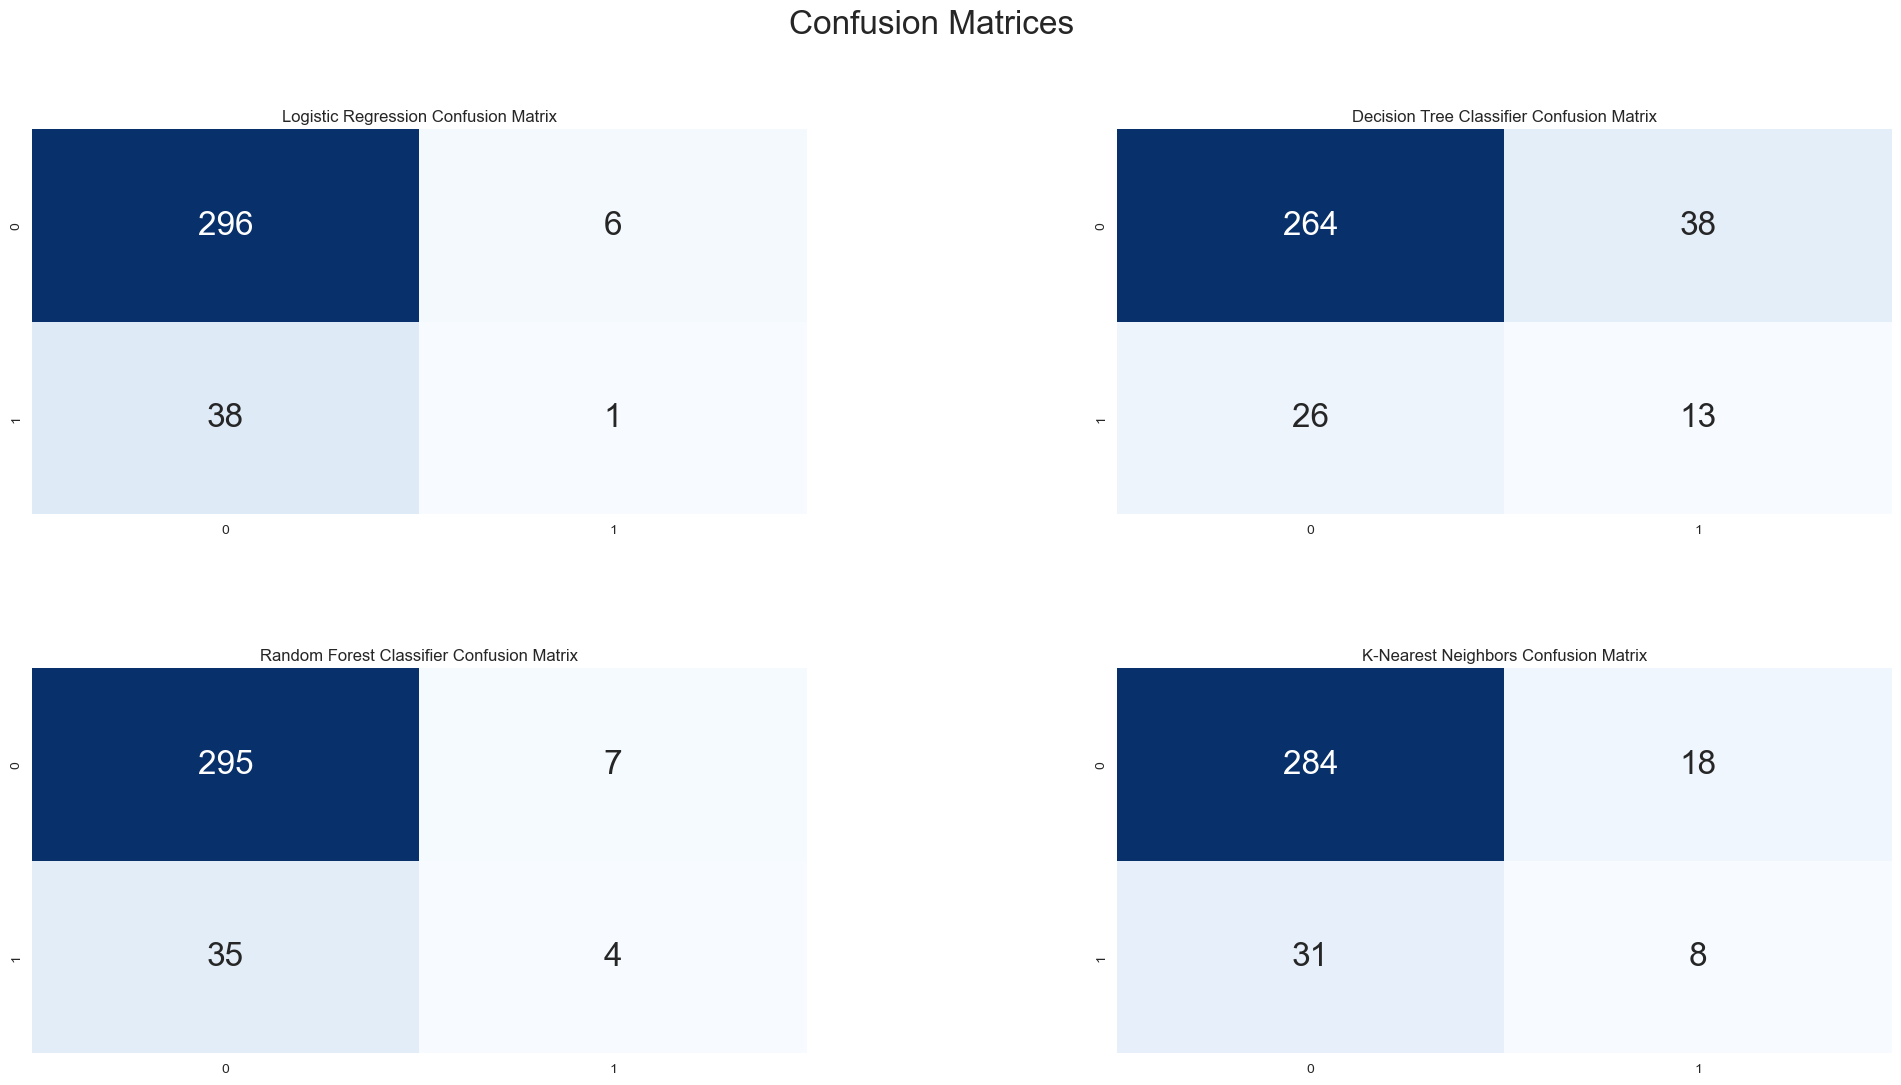

In [17]:
from sklearn.metrics import confusion_matrix

y_head_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_head_lr)

y_head_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

y_head_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_head_rfc)

y_head_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_head_knn)

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 2, 1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2, 2, 2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2, 2, 3)
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2, 2, 4)
plt.title("K-Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

# 2. Feature Importance

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance

In [19]:
X = df.drop(['stroke'], axis=1)
y = df.stroke.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


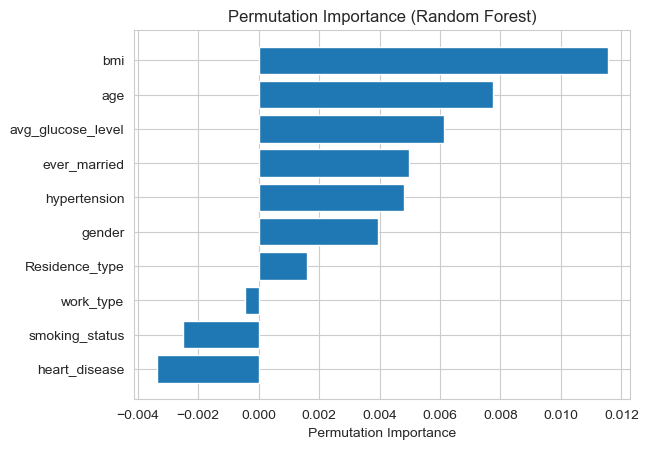

In [22]:
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()

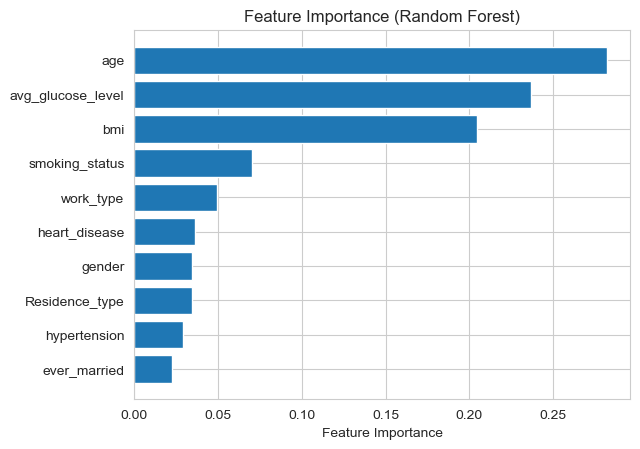

In [23]:
# Get feature importances from RandomForest
rf_feature_importances = rf_classifier.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

# 3. Modelling (Determine Accuracy)

In [24]:
conda install -c anaconda graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree
import pydotplus

In [27]:
important_features = ['age', 'avg_glucose_level', 'bmi', 'work_type']
f = df[important_features]  # input
t = df['stroke']  # target

In [28]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True